In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
amazon_df = pd.read_csv(
    '/content/drive/MyDrive/ca.webinars/Pandas Series/data/amzn.csv',
    index_col=0,
    parse_dates=['Date'],
    dtype={'Volume': 'int64'},
    )

In [5]:
tesla_df = pd.read_csv(
    '/content/drive/MyDrive/ca.webinars/Pandas Series/data/tsla.csv',
    index_col=0,
    parse_dates=['Date'],
    dtype={'Volume': 'int64'},
    )

In [6]:
df_all = pd.concat([amazon_df, tesla_df]).sort_values(by=['Date', 'Symbol'], ascending=[False, True]).reset_index(drop=True)

In [7]:
df_all.head()

,Date,Close,Volume,Symbol
0,2021-01-29,3206.199951,4285600,AMZN
1,2021-01-29,793.530029,34990800,TSLA
2,2021-01-28,3237.620117,3149200,AMZN
3,2021-01-28,835.429993,26378000,TSLA
4,2021-01-27,3232.580078,4660200,AMZN


In [8]:
pivot_close = df_all.pivot(
    index='Date',
    columns='Symbol',
    values='Close'
).sort_index(ascending=True)

In [9]:
pivot_close.head()

Symbol,AMZN,TSLA
Date,,
2020-07-01,2878.699951,223.925995
2020-07-02,2890.300049,241.731995
2020-07-06,3057.040039,274.316010
2020-07-07,3000.120117,277.971985
2020-07-08,3081.110107,273.175995


In [10]:
# How to evaluate the performance in stocks?

In [11]:
# 1. Difference in price

In [13]:
simple_diff_df = pivot_close.diff(periods=1)

In [14]:
simple_diff_df

Symbol,AMZN,TSLA
Date,,
2020-07-01,NaN,NaN
2020-07-02,11.600098,17.806000
2020-07-06,166.739990,32.584015
2020-07-07,-56.919922,3.655975
2020-07-08,80.989990,-4.795990
...,...,...
2021-01-25,1.770020,34.159973
2021-01-26,32.129883,2.290039
2021-01-27,-93.549805,-18.930054


In [15]:
pivot_close.diff(periods=-1).head()

Symbol,AMZN,TSLA
Date,,
2020-07-01,-11.600098,-17.806000
2020-07-02,-166.739990,-32.584015
2020-07-06,56.919922,-3.655975
2020-07-07,-80.989990,4.795990
2020-07-08,-101.519775,-5.679993


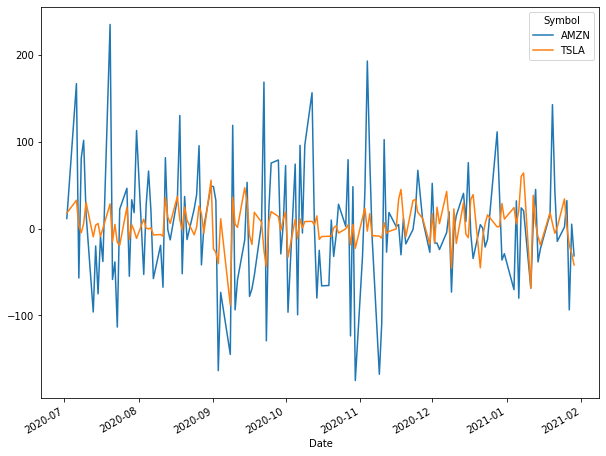

In [16]:
simple_diff_df.plot(figsize=(10,8))

In [17]:
# 2. Daily returns

$$ R_t = P_t / P_{t-1} -1 $$

In [18]:
def daily_returns(row):
  return row.pct_change()

In [19]:
simple_returns_df = pivot_close.apply(lambda x: daily_returns(x))

In [20]:
simple_returns_df.head()

Symbol,AMZN,TSLA
Date,,
2020-07-01,NaN,NaN
2020-07-02,0.004030,0.079517
2020-07-06,0.057690,0.134794
2020-07-07,-0.018619,0.013328
2020-07-08,0.026996,-0.017254


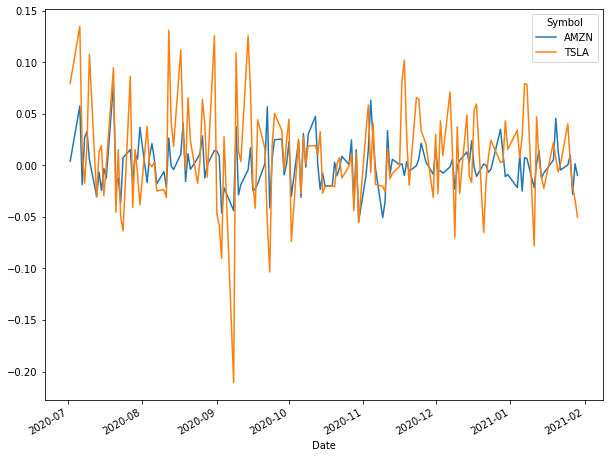

In [21]:
simple_returns_df.plot(figsize=(10,8))

In [22]:
(pivot_close['AMZN']/pivot_close['AMZN'].shift(periods=1)) - 1

Date
2020-07-01         NaN
2020-07-02    0.004030
2020-07-06    0.057690
2020-07-07   -0.018619
2020-07-08    0.026996
                ...   
2021-01-25    0.000538
2021-01-26    0.009754
2021-01-27   -0.028126
2021-01-28    0.001559
2021-01-29   -0.009705
Name: AMZN, Length: 147, dtype: float64

In [23]:
# Building Trading Strategies

In [24]:
def sma(row, window_time):
  return row.rolling(window=window_time).mean()

In [27]:
amazn_df_sma = pd.DataFrame()
amazn_df_sma['sma_5'] = pivot_close['AMZN'].rolling(window=5).mean()
amazn_df_sma['sma_10'] = pivot_close['AMZN'].rolling(window=10).mean()
amazn_df_sma['sma_20'] = pivot_close['AMZN'].rolling(window=20).mean()
amazn_df_sma.index = pivot_close.index

In [28]:
amazn_df_sma.head(10)

,sma_5,sma_10,sma_20
Date,,,
2020-07-01,NaN,NaN,NaN
2020-07-02,NaN,NaN,NaN
2020-07-06,NaN,NaN,NaN
2020-07-07,NaN,NaN,NaN
2020-07-08,2981.454053,NaN,NaN
2020-07-09,3042.240039,NaN,NaN
2020-07-10,3104.180029,NaN,NaN
2020-07-13,3113.572021,NaN,NaN
2020-07-14,3130.347998,NaN,NaN


In [29]:
# Long or Short?

In [30]:
# PRICE > SMA -> LONG
# PRICE < SMA --> SHORT

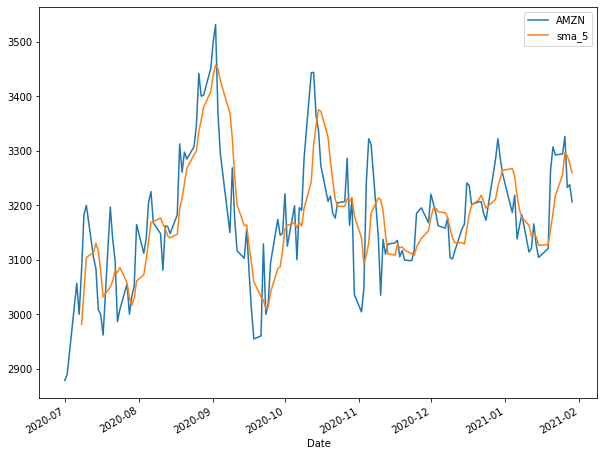

In [31]:
import matplotlib.pyplot as plt
pivot_close['AMZN'].plot(figsize=(10,8))
amazn_df_sma['sma_5'].plot(figsize=(10,8))
plt.legend()
plt.show()

In [32]:
# getting Cumulatiuve Returns in pandas

In [33]:
def cumulative_returns(row):
  return (row + 1).cumprod()

In [34]:
cum_daily_returns = simple_returns_df.apply(lambda x: cumulative_returns(x))

In [35]:
cum_daily_returns.head()

Symbol,AMZN,TSLA
Date,,
2020-07-01,NaN,NaN
2020-07-02,1.004030,1.079517
2020-07-06,1.061952,1.225030
2020-07-07,1.042179,1.241356
2020-07-08,1.070313,1.219939


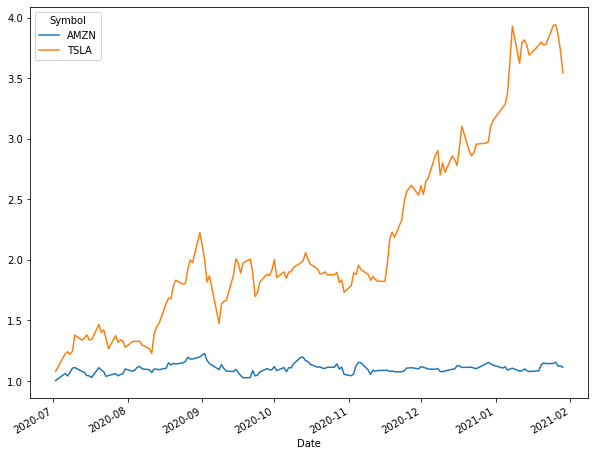

In [36]:
cum_daily_returns.plot(figsize=(10,8))

In [ ]:
# pd.date_range()
# ewa()